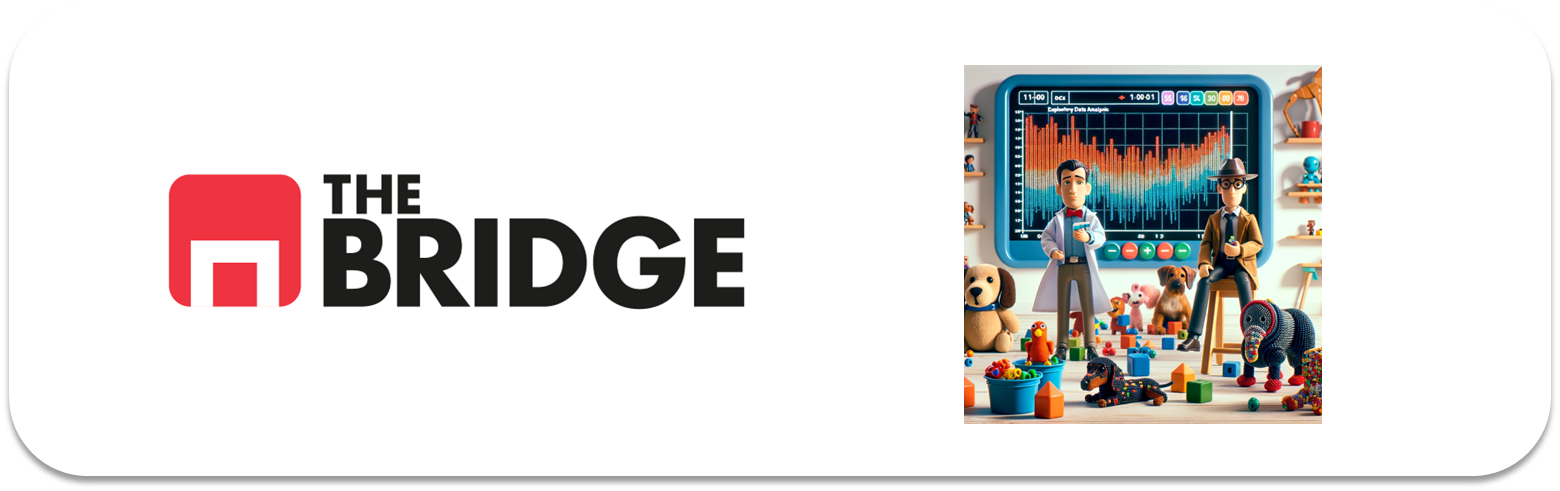

### Pequeño disclaimer:

Tanto en la sesión dedicada a correlación como en esta y la dedicada a ver relaciones entre categóricas y numéricas haremos uso (grosero) del test de hipótesis. Lo hacemos para que lo vayas utilizando y te acostumbres pero ojo puede que en el caso de tu dataset no sea necesario es decir que no necesites hacer test de hipótesis para estar seguro de lo que ves. ¿Cuál es la diferencia? El test de hipótesis tiene sentido cuando estamos trabajando con una muestra de todos los datos posibles, momento en el cual no podemos decir que lo que vemos en nuestro análisis es directamente extrapolable a todos los datos que pudiera haber (porque no los estamos tratando, lógicamente). En el caso de que tus datos sean todos los datos que hay del fenómeno o situación que estás estudiando, no necesitas test porque no tienes que extrapolar nada. Por ejemplo:
* Si estoy analizando las obras completas de Stephen King (big data sin duda) y solo voy a hablar de los resultados referidos a Stephen King y encuentro que "Murder" correla con la palabra "Redrum" (tienen un r= 0.99), pues no necesito hacer test de hipótesis, puedo decir con toda tranquilidad que en las obras de Stephen King la palabra Murder correla con Redrum. 
* Imagina ahora que sólo has podido analizar la mitad de la obra de Stephen King (sigue siendo big data), y encuentras otra correlación interesante. Si queremos extrapolarla a toda la obtra de Stepehen King con cierta confianza, tendremos que aplicar un test sí o sí.

## Análisis de Datos (Bivariante): Test de relación entre variables categóricas

Para ver si dos variables categóricas presentan alguna relación (cambios conjuntos, cambios en una de un tipo se dan al mismo tiempo que cambios de otro tipo en la otra, etc) hicimos el análisis visual. Si mis datos son todos los datos que manejo, ese análisis visual ya nos dice si existe la relación, pero si mis datos no son todos o quiero extrapolarlos, tengo que ganar confianza en lo que he "visto" en el análisis visual y para ello aplicamos los test.

### Test Chi-Cuadrado (χ²)

Nosotros para ver la relación entre dos variables categóricas vamos a emplear el test χ², al final te dejo un anexo con las condiciones en las que se puede aplicar (ojo, no siempre podremos tenlo en cuenta), y el método "manual" para hacer el test. Ahora vamos a ir al grano... 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

#### Caso 1. Seguros: Relación response-state y response-renew_offer_type

Recordemos como era esa relación visualmente.

Para response-state


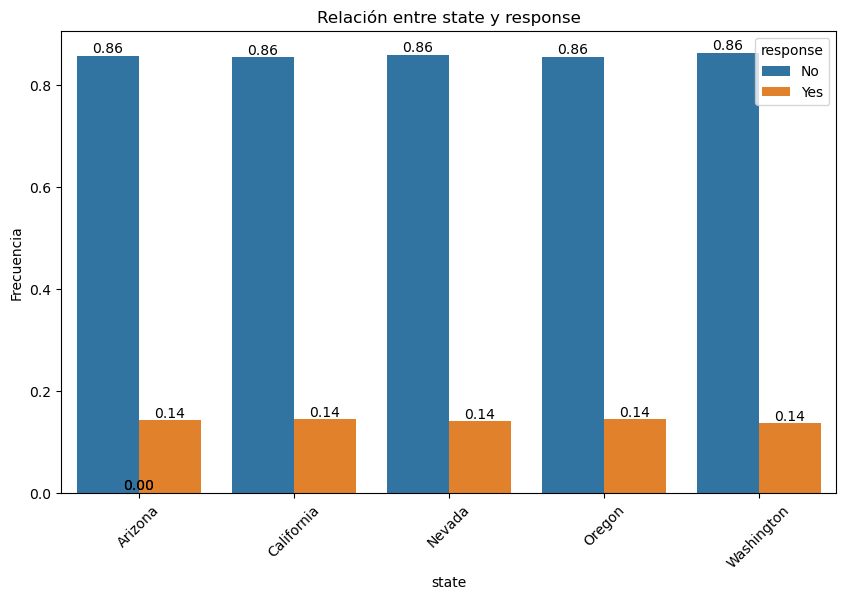

In [5]:
plot_categorical_relationship_fin(df_seguros, "state","response", relative_freq = True, show_values = True)

Para response-renew_offer_type

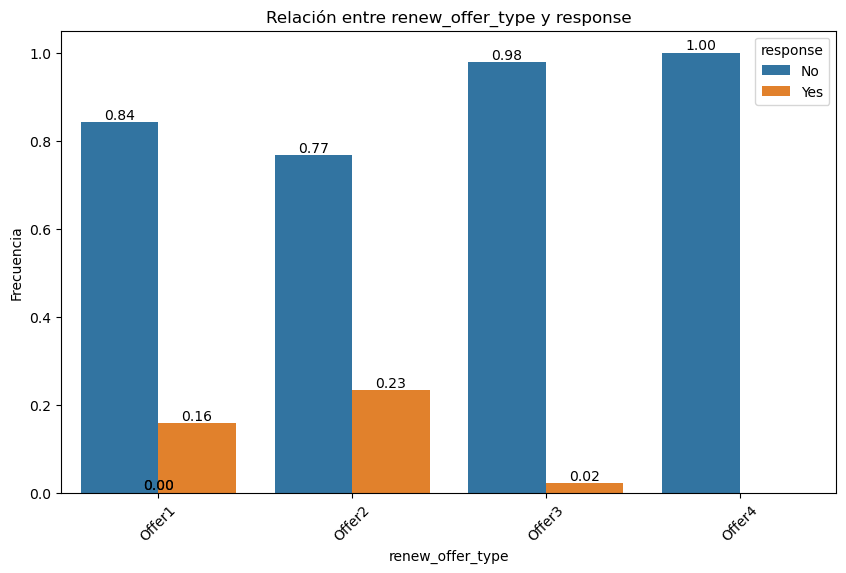

In [7]:
plot_categorical_relationship_fin(df_seguros, "renew_offer_type","response", relative_freq = True, show_values = True)

#### Procedimiento

(Insisto si los datos son toda la población y no vamos a extrapolar: no hay relación entre response y estado, hay una relación interesante entre response y el tipo de oferta)

**#1 Obtenemos la tabla de contingencia** (las frecuencias de aparición de la combinación de valores)

In [9]:
tabla_contingencia = pd.crosstab(df_seguros['response'], df_seguros['state'])

tabla_contingencia


state,Arizona,California,Nevada,Oregon,Washington
response,,,,,
No,1460,2694,758,2225,689
Yes,243,456,124,376,109


**#2 Aplicamos la prueba** (utilizando la función adecuada del módulo scipy.stats) y mostramos los resultados

In [11]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.4384775299588324
P-Value: 0.9792071512335693
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[1459.1283118  2698.91613751  755.6965185  2228.53361069  683.7254215 ]
 [ 243.8716882   451.08386249  126.3034815   372.46638931  114.2745785 ]]


**#3 Interpretación de resultados** (depende de lo que estemos esperando)

El test chi-2 tiene como hipótesus nula (o de partida) la independencia de las variables, por tanto un P-Value menor de 0.05 nos diría que podemos rechazar la hipótesis de partida con seguridad y pensar que existe una relación estadísticamente significativa. 

¿Y en este caso? Pues en este caso, es todo lo contrario, refuerza la hipótesis de partida de que son independientes, añadiendo el análisis visual... Sí, son independientes 

Aplicado de una vez a la otra relación (response-renew_offer_type):

In [13]:
tabla_contingencia = pd.crosstab(df_seguros['response'], df_seguros['renew_offer_type'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 548.1644514293835
P-Value: 1.73695030654266e-118
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[3214.70899934 2506.99321217 1226.9358441   877.36194438]
 [ 537.29100066  419.00678783  205.0641559   146.63805562]]


Hmm, ojo que p-value no es 1.73 está en notación científica (es eso con una coma y 117 ceros delante) o sea que podemos tener cierta confianza en que sí que la respuesta depende de la oferta (ya un poco de perogrullo) pero así es como funciona.

#### Caso 2. Viajes: Relación aircompany-destino

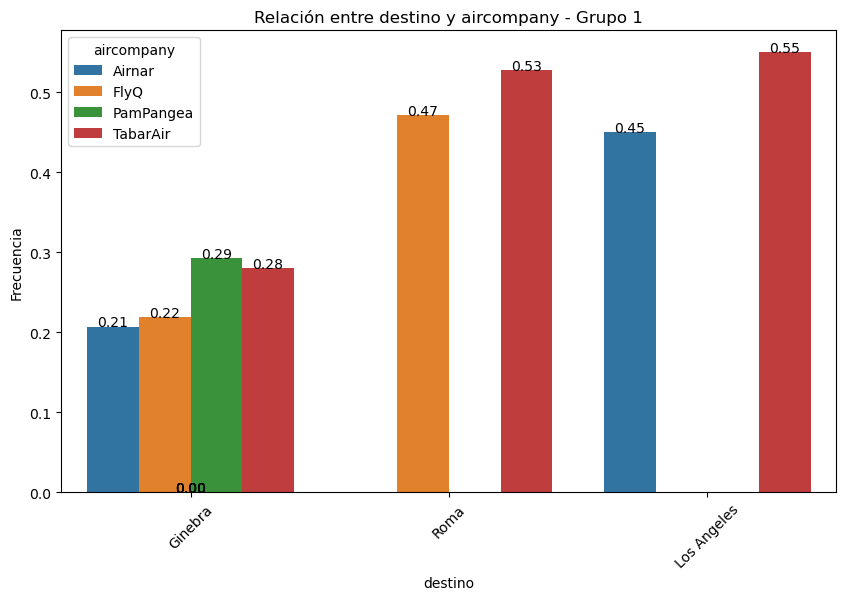

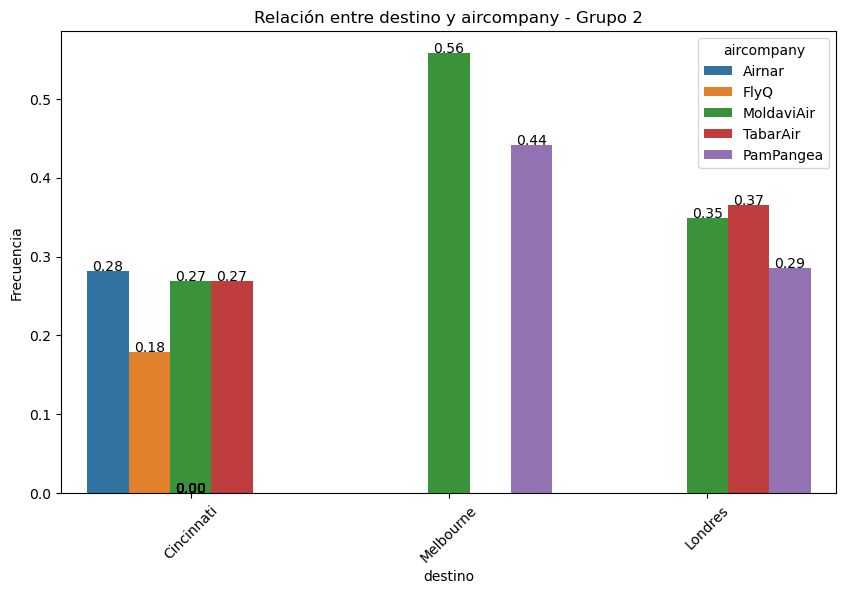

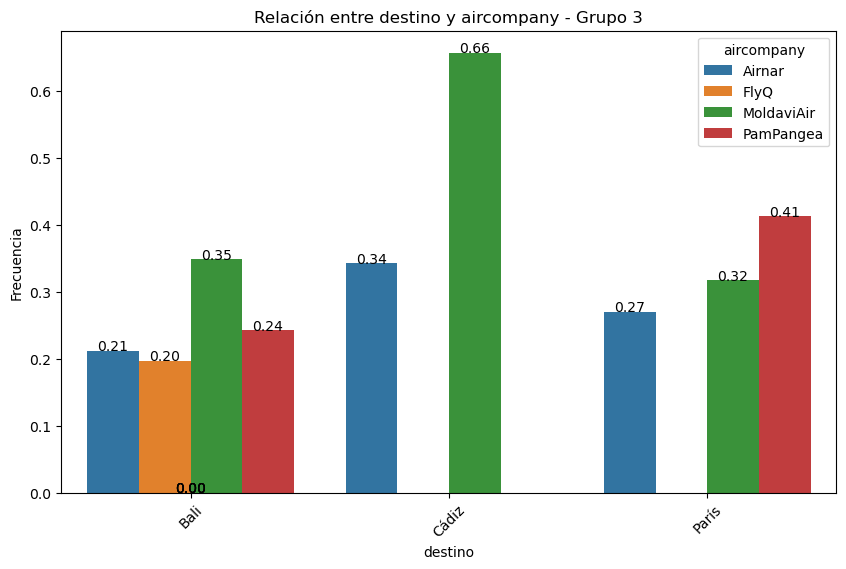

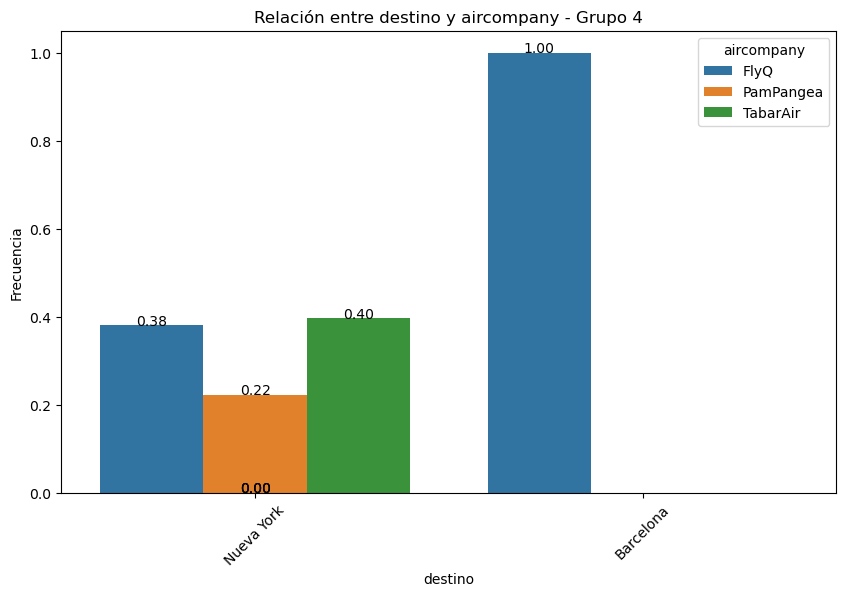

In [15]:
plot_categorical_relationship_fin(df_air_jun, "destino","aircompany", relative_freq = True, show_values = True, size_group = 3)

In [17]:
tabla_contingencia = pd.crosstab(df_air_jun['aircompany'], df_air_jun['destino'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 513.3047172905651
P-Value: 1.8324011299397667e-83
Grados de Libertad: 40
Tabla de Frecuencias Esperadas:
 [[11.          2.33333333 13.          5.83333333 13.66666667 10.5
   6.66666667  7.16666667 10.5        10.5         8.83333333]
 [11.88        2.52       14.04        6.3        14.76       11.34
   7.2         7.74       11.34       11.34        9.54      ]
 [14.63        3.10333333 17.29        7.75833333 18.17666667 13.965
   8.86666667  9.53166667 13.965      13.965      11.74833333]
 [12.87        2.73       15.21        6.825      15.99       12.285
   7.8         8.385      12.285      12.285      10.335     ]
 [15.62        3.31333333 18.46        8.28333333 19.40666667 14.91
   9.46666667 10.17666667 14.91       14.91       12.54333333]]


Según el test hay una relación estadística significativa, relación que podíamos observar visualmente (el hecho de que no todas las compañías viajen a todos los lugares ya es una relación, por ejemplo)

### ANEXO: Test Chi-cuadrado (χ²): ¿Cuándo Aplicar la Prueba de Chi-Cuadrado?



- **Objetivo:** Se utiliza cuando quieres determinar si hay una asociación significativa entre dos variables categóricas. Por ejemplo, si quieres saber si hay una relación entre género (hombre/mujer) y preferencia de un producto (me gusta/no me gusta).

- **Condiciones de Uso:** Idealmente, se utiliza cuando las categorías son mutuamente excluyentes y las frecuencias observadas en las categorías son suficientemente altas (generalmente, se espera que el 80% de las celdas tengan una frecuencia esperada de al menos 5).


Links: [test chi-cuadrado en wikipedia](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2) y [paso a paso](https://datatab.es/tutorial/chi-square-test)